# <center> Decision Tree Classifier </center>  

***

## <center> Wine Quality Prediction </center>
### <center> Home Work Solution </center>

---


### Introduction

**Goal:** Build a system to predict the quality of wine using Decision Tree Classifier Algorithm  
**Learning Type:** Supervised  
**Problem Type:** Binary Classification  

---

### Datasets
**Data Source:** Kaggle    
**Data Nature:** Labeled  

## IMPORT MODULES

In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, roc_auc_score, auc
from IPython.display import Image  
from sklearn.tree import export_graphviz
from six import StringIO
import graphviz
import pydot
import matplotlib.pyplot as plt # for plotting
import matplotlib.image as mpimg
import seaborn as sns # to generate stylised plots

## LOADING THE DATASET

In [4]:
data = pd.read_csv("winequality_red.csv")
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


The data set consists following Input variables :
1 - fixed acidity  2 - volatile acidity  3 - citric acid  4 - residual sugar  5 - chlorides  6 - free sulfur dioxide

7 - total sulfur dioxide  8 - density  9 - pH   10 - sulphates   11 - alcohol

and the Output variable gives the quality of th wine based on the input variables: 

12 - quality (score between 0 and 10)

## UNDERSTANDING THE DATASET

In [5]:
data.shape

(1599, 12)

In [6]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


We can see there is no missing data in the columns. Great!!

## DATA PREPROCESSING

In [9]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## EXPLORATORY DATA ANALYSIS

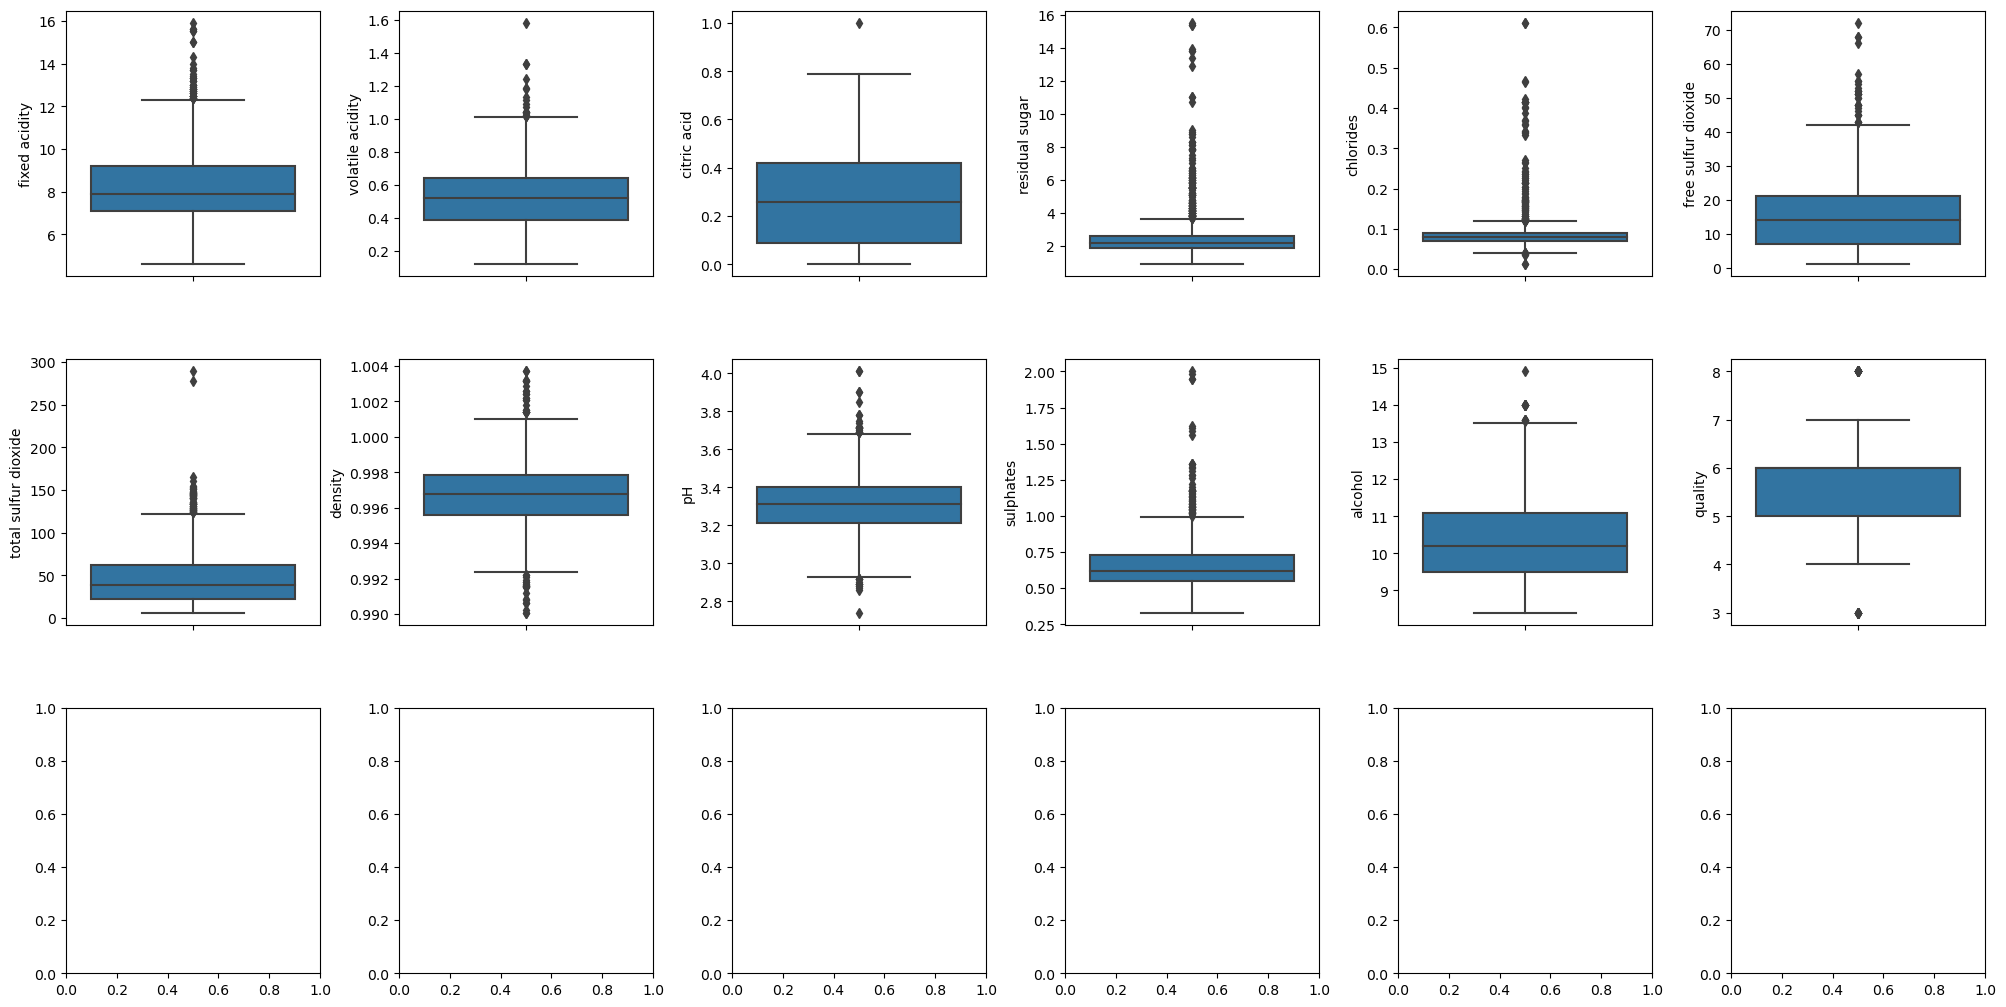

In [10]:
#Create box plots
fig, ax = plt.subplots(ncols=6, nrows=3, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in data.items():
    if col != 'type':
        sns.boxplot(y=col, data=data, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

<AxesSubplot:>

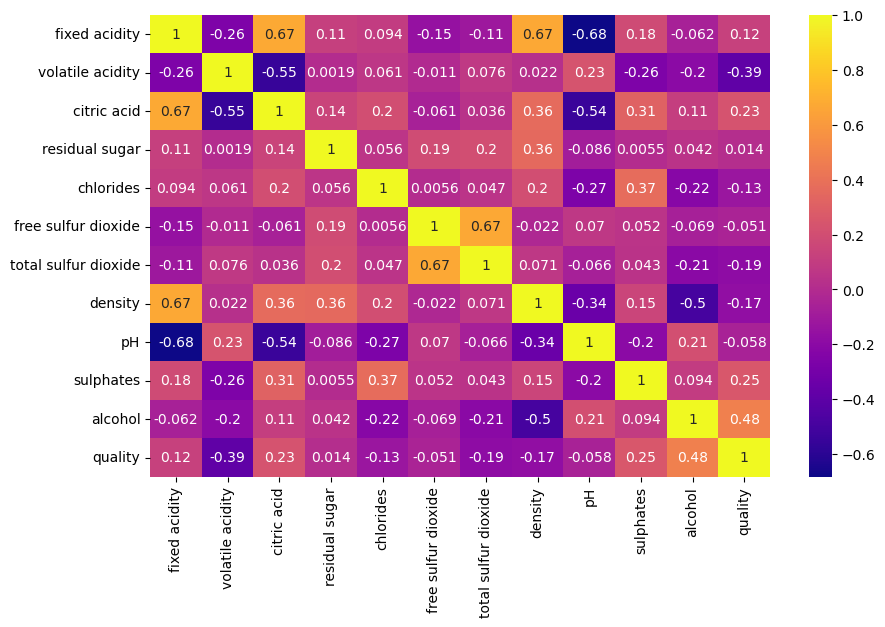

In [11]:
fig,ax = plt.subplots(figsize = (10,6))
sns.heatmap(data.corr(),cmap = 'plasma', annot= True)

<AxesSubplot:>

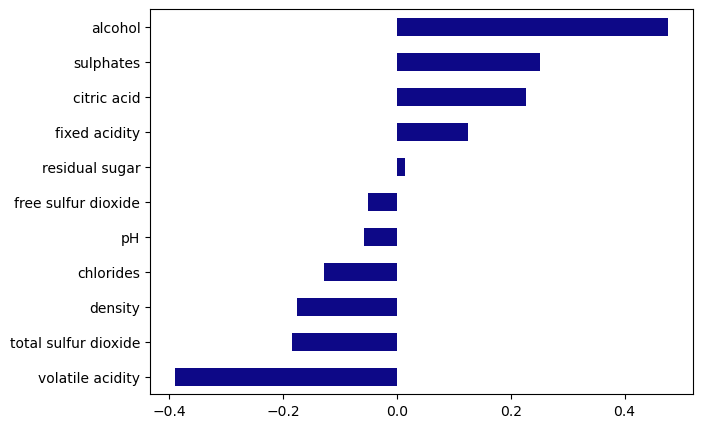

In [12]:
data.corr()['quality'][:-1].sort_values().plot(kind = 'barh',figsize = (7,5), colormap = 'plasma')

## DATA PROCESSING

In [13]:
data.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [14]:
data['quality_binary'] = data.quality.apply(lambda x : 1 if x >6 else 0)

In [15]:
data.quality_binary.value_counts()

0    1382
1     217
Name: quality_binary, dtype: int64

## INPUT SPLIT

In [16]:
X = data.drop(columns = ['quality','quality_binary']).values
y = data.quality_binary.values.reshape(-1, 1)

In [17]:
x_train,x_test,y_train,y_test = train_test_split(X,y,train_size= 0.75, random_state= 355)

## MODEL TRAINING

In [18]:
#let's first visualize the tree on the data without doing any pre processing
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [19]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [20]:
y_pred = clf.predict(x_test)

## MODEL ACCURACY

In [21]:
clf.score(x_train,y_train)

1.0

In [22]:
clf.score(x_test,y_test)

0.8875

In [23]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93       354
           1       0.51      0.70      0.59        46

    accuracy                           0.89       400
   macro avg       0.73      0.80      0.76       400
weighted avg       0.91      0.89      0.89       400

[[323  31]
 [ 14  32]]


In [24]:
roc_auc_score(y_test, y_pred )

0.8040407762220585

## VISUALIZE DECISION TREE

In [25]:
feature_set = data.drop(columns = ['quality','quality_binary']).columns

In [26]:
feature_set

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [27]:
dot_data = tree.export_graphviz(clf, 
                     feature_names=feature_set,
                     out_file = 'class_tree.dot',
                     class_names='quality',  
                     filled=True, rounded=True,  
                     special_characters=True)  
(graph,) = pydot.graph_from_dot_file('class_tree.dot')
graph.write_png('DT_classifier.png')

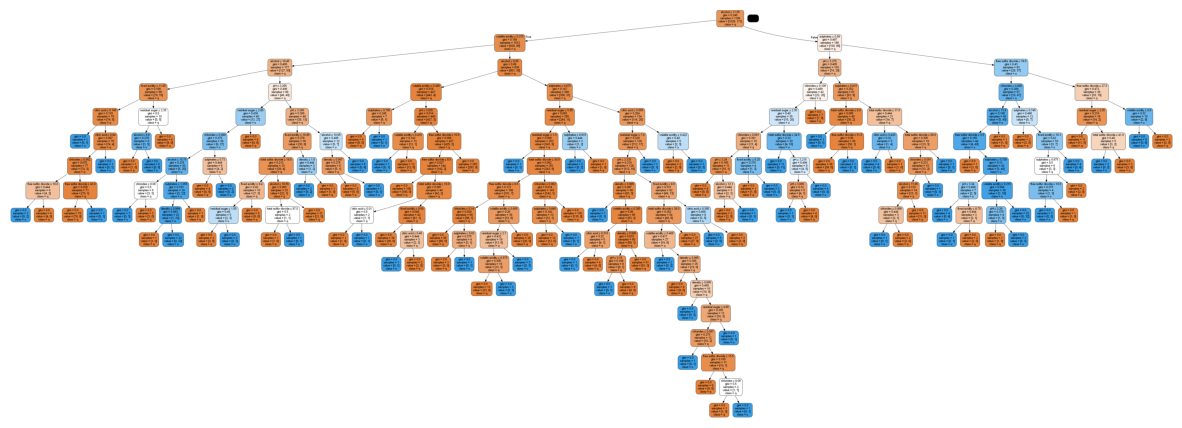

In [28]:
plt.subplots(figsize = (15,15))
plt.axis('off')
plt.imshow(mpimg.imread('DT_classifier.png'))

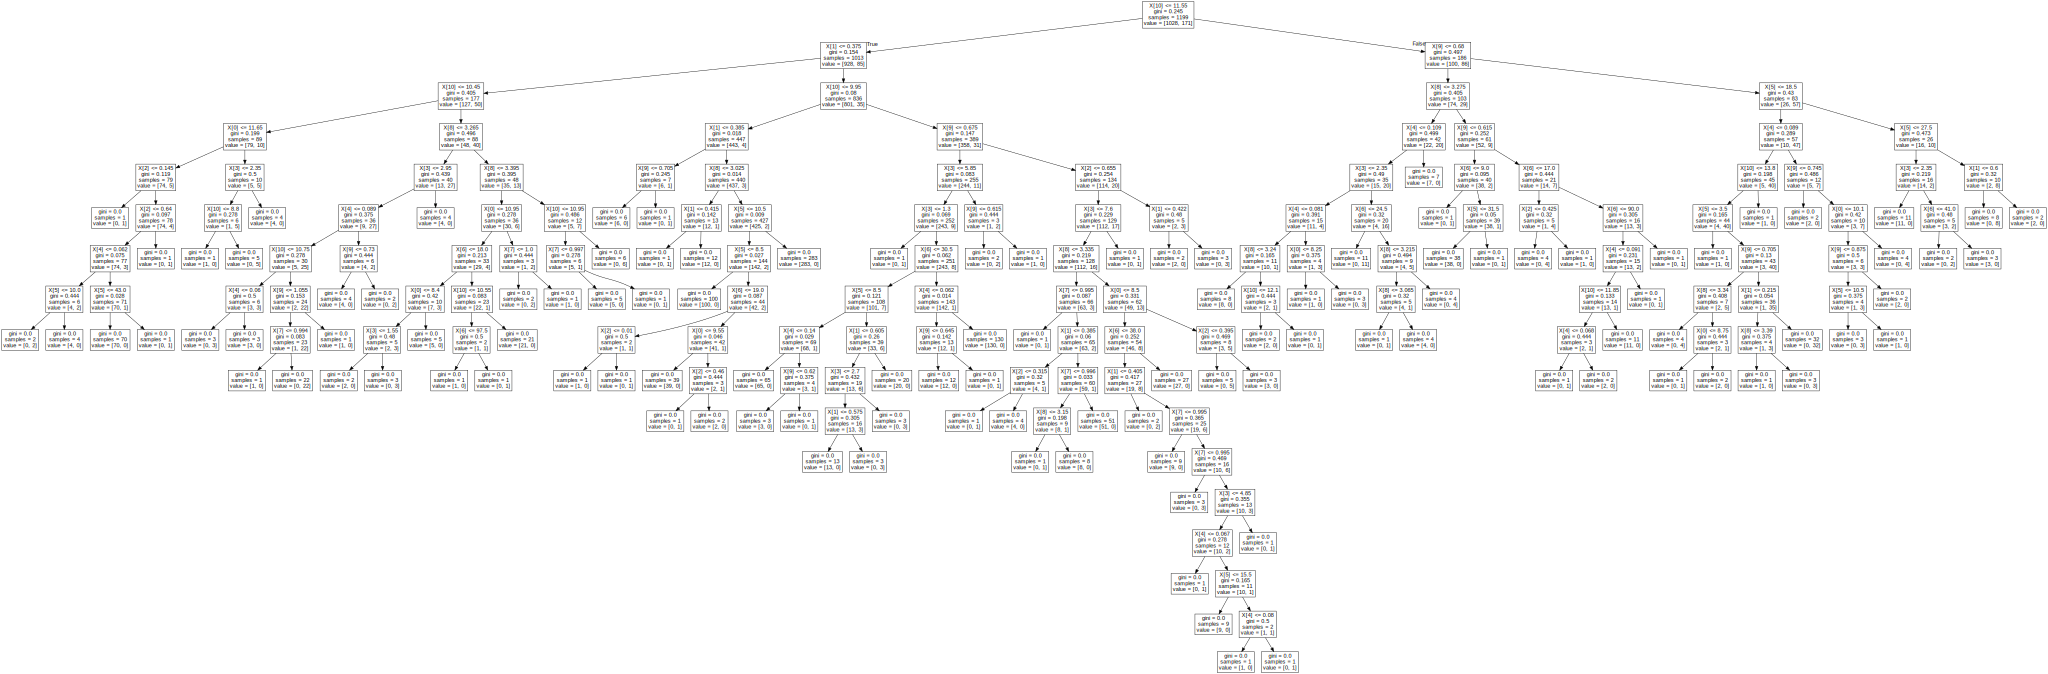

In [29]:
dot_data=tree.export_graphviz(clf)
graph=graphviz.Source(dot_data)
graph

In [30]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_set,class_names='quality')
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('winequality.png')
Image(graph.create_png())

NameError: name 'pydotplus' is not defined

## HYPER PARAMTER TUNING

In [ ]:
grid_param={
    "criterion": ['gini','entropy'],
    "splitter":['best','random'],
    "max_depth":range(2,40,1),
    "min_samples_split" : range(2,10,1),
    "min_samples_leaf" : range(1,10,1),
}

In [ ]:
grid_ccp = GridSearchCV(estimator=clf,param_grid=grid_param,cv=5,n_jobs=-1)

In [ ]:
grid_ccp.fit(x_train,y_train)

In [ ]:
grid_ccp.best_params_

In [ ]:
model_cpp_new = DecisionTreeClassifier(criterion='entropy',
                                       max_depth=7,min_samples_leaf=2,min_samples_split=6,splitter='random')

In [ ]:
model_cpp_new.fit(x_train,y_train)

## ACCURACY CHECK

In [ ]:
model_cpp_new.score(x_train,y_train)

In [ ]:
model_cpp_new.score(x_test,y_test)